# Подключение библиотек и скачивание данных

In [ ]:
!pip install imgviz ultralytics pyyaml --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.9 MB/s eta 0:00:00


In [ ]:
# Подключаем гугл диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir('/content/drive/My Drive/Я-профи/НТО хакатон 2025/data')
os.getcwd()

'/content/drive/My Drive/Я-профи/НТО хакатон 2025/data'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import os
from pathlib import Path
from shutil import copy
import argparse

from tqdm import tqdm

from ultralytics import YOLO

import numpy as np

import imgviz
from PIL import Image

from shutil import copy

from sklearn.model_selection import train_test_split

import argparse
import shutil

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
'''
загрузка с платформы ODS
Нужно сделать один раз чтобы скачать данные напрямую в гугл диск,
если вы его подключили
если гугл диск не подключили данные скачаются в colab
и придеться каждый раз при запуске нотубука их скачивать
'''

!wget https://storage.yandexcloud.net/ds-ods/files/files/baf3b148/train.csv
!wget https://storage.yandexcloud.net/ds-ods/files/data/docs/competitions/NTO_2024_2025/competition_2_individ/train__1.zip
!wget https://storage.yandexcloud.net/ds-ods/files/data/docs/competitions/NTO_2024_2025/competition_2_individ/train__2.zip
!wget https://storage.yandexcloud.net/ds-ods/files/data/docs/competitions/NTO_2024_2025/competition_2_individ/train__3.zip
!wget https://storage.yandexcloud.net/ds-ods/files/data/docs/competitions/NTO_2024_2025/competition_2_individ/train__4.zip
!wget https://storage.yandexcloud.net/ds-ods/files/files/b7208b30/check.zip

--2024-12-11 18:04:31--  https://storage.yandexcloud.net/ds-ods/files/files/baf3b148/train.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2979055 (2.8M) [text/csv]
Saving to: ‘train.csv’

train.csv           100%[===================>]   2.84M  2.12MB/s    in 1.3s    

2024-12-11 18:04:33 (2.12 MB/s) - ‘train.csv’ saved [2979055/2979055]

--2024-12-11 18:04:33--  https://storage.yandexcloud.net/ds-ods/files/data/docs/competitions/NTO_2024_2025/competition_2_individ/train__1.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1798294393 (1.7G) [application/zip]
Saving to: ‘train__1.zip’

tr

In [ ]:
# У нас скачалось 4 архива с данными
# Их много, поэтому в один архив не влезли
# Создаем папки куда положим данные
os.mkdir("animal_obj_detect")
os.mkdir("animal_obj_detect/train")
os.mkdir("tmp")

# Распаковка архивов train data
! unzip train__1.zip -d tmp
! unzip train__2.zip -d tmp
! unzip train__3.zip -d tmp
! unzip train__4.zip -d tmp

# Это test
! unzip check.zip -d data

In [ ]:
# 4 архива распакавались в 4 папки
# Перенесем все фотографии в animal_obj_detect/train

train_path = "animal_obj_detect/train"
data_path = "tmp"
for folder_name in os.listdir(data_path):
  folder_path = os.path.join(data_path, folder_name)
  for file_name in os.listdir(folder_path):
    src = os.path.join(folder_path, file_name)
    shutil.move(src, train_path)

In [ ]:
# Перенесем train.csv в data/train
shutil.copyfile("train.csv", "animal_obj_detect/train.csv")

'data/train.csv'

In [ ]:
# Вот такая структура получилась
# animal_obj_detect/
# --- train/
#       --- 1.JPG
#       --- 2.JPG
# --- train.csv

# Анализ данных

In [ ]:
# Считаем csv файл и посмотрим что там лежим

train_df_path = "train.csv"
train_images_dir = "animal_obj_detect/train"

train_df = pd.read_csv(train_df_path)
train_df.head()

,image_name,detection
0,d4b681c636be92a99d2169685169ddce.JPG,4 0.5298713445663452 0.42401960492134094 0.253...
1,af429cc238c384111b2f6e4ace00638c.JPG,6 0.6738590002059937 0.6928213834762573 0.5684...
2,2329fe3d86fa593db201c3897ad74d4c.JPG,1 0.1510416716337204 0.463131308555603 0.23749...
3,309c121c529fb223e87ac1ea9d43073c.JPG,6 0.6556299924850464 0.7617244720458984 0.6808...
4,9060b55db1f35ce70948388b0e0158ba.JPG,5 0.7708333134651184 0.5369875431060791 0.4583...


In [ ]:
'''
В одной ячейке лежит следующий формат данных:
detection - это по сути наш y
в нем следующий формат:
class x_center y_center h w

Где:
- class - класс к которому относится выделенное животное
- x_center y_center - координаты bbox в которое выделено животное
- h w - половина высоты bbox

Подробнее про формат данных: https://docs.ultralytics.com/datasets/detect/#ultralytics-yolo-format

'''
train_df.loc[5, 'detection']

# x_left, y_left, x_right, y_right
# x_left, y_left, w, h
# x_center, y_center, w, h

# yolo_format, coco_format
# 0 - енот
# 1 - олень
# 2 - тигр

'0 0.4846229553222656 0.8686867356300354 0.10267898440361023 0.14790759980678558'

In [ ]:
train_df.loc[201, 'detection']

'5 0.42984068393707275 0.4211229979991913 0.324754923582077 0.3502674102783203;5 0.8155637383460999 0.405303031206131 0.3688725233078003 0.6965240240097046'

In [ ]:
type(train_df.loc[201, 'detection'])

str

In [ ]:
s = '5 0.42984068393707275 0.4211229979991913 0.324754923582077 0.3502674102783203;5 0.8155637383460999 0.405303031206131 0.3688725233078003 0.6965240240097046'
s.split(';')

['5 0.42984068393707275 0.4211229979991913 0.324754923582077 0.3502674102783203',
 '5 0.8155637383460999 0.405303031206131 0.3688725233078003 0.6965240240097046']

In [ ]:
# Инициализация пустых списков для хранения меток и координат ограничивающих рамок
label_data = []
cx_data, cy_data, w_data, h_data = [], [], [], []

# Проход по каждой строке в обучающем наборе данных
for index, row in train_df.iterrows():
    # Каждая строка (row['detection']) содержит строку с боксами объектов, разделенными точкой с запятой
    for markup in row['detection'].split(";"):
        # Извлекаем метку и координаты ограничивающей рамки (центр x, центр y, ширина, высота)
        label, cx, cy, w, h = markup.split()

        # Преобразуем координаты из строки в число с плавающей точкой для дальнейших вычислений
        cx = float(cx)
        cy = float(cy)
        w = float(w)
        h = float(h)
        label = int(label)

        # Добавляем метку и координаты ограничивающей рамки в соответствующие списки
        label_data.append(label)
        cx_data.append(cx)
        cy_data.append(cy)
        w_data.append(w)
        h_data.append(h)

In [ ]:
label_data[:3]

[4, 6, 1]

In [ ]:
cx_data[:3]

[0.5298713445663452, 0.6738590002059937, 0.1510416716337204]

<Figure size 640x480 with 0 Axes>

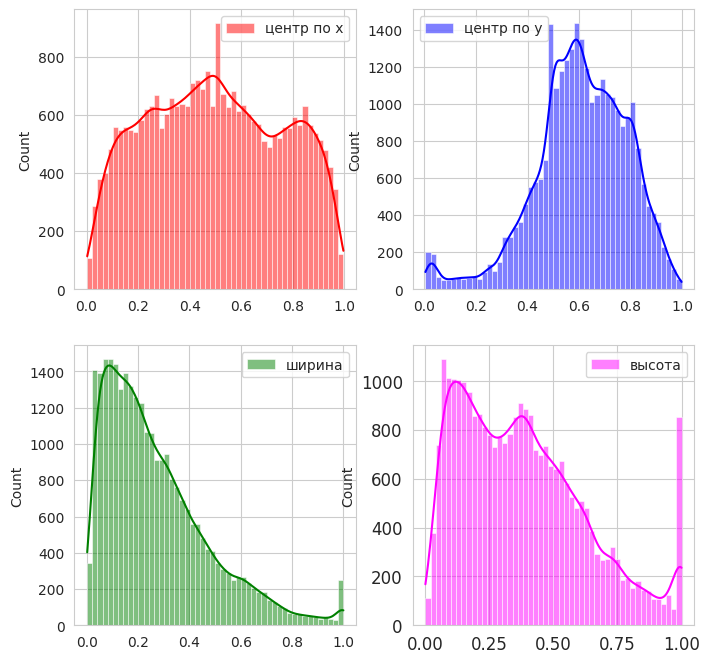

In [ ]:
# Установка стиля графиков
sns.set_style('whitegrid')

# Создание фигуры и сетки из подграфиков 2x2 для размещения каждого графика отдельно
plt.figure()
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# Построение гистограммы распределения координаты центра по оси X с использованием KDE (оценка плотности)
sns.histplot(cx_data, kde=True, bins=50, color="red", ax=ax[0, 0], label='центр по х')

# Построение гистограммы распределения координаты центра по оси Y
sns.histplot(cy_data, kde=True, bins=50, color="blue", ax=ax[0, 1], label='центр по у')

# Построение гистограммы распределения ширины объектов
sns.histplot(w_data, kde=True, bins=50, color="green", ax=ax[1, 0], label='ширина')

# Построение гистограммы распределения высоты объектов
sns.histplot(h_data, kde=True, bins=50, color="magenta", ax=ax[1, 1], label='высота')

# Отображение легенды для каждого графика
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()

# Настройка размеров меток на осях для улучшения читаемости
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)

# Показать графики
plt.show()


In [ ]:
# Определение минимального и максимального значений для ширины bounding box
width_data_min = np.min(w_data)
width_data_max = np.max(w_data)

# Определение минимального и максимального значений для высоты bounding box
height_data_min = np.min(h_data)
height_data_max = np.max(h_data)

# Вывод максимального и минимального значений для ширины и высоты bounding box
print(f"Высота bounding box максимальная {height_data_max} и минимальная {height_data_min}")
print(f"Ширина bounding box максимальная {width_data_max} и минимальная {width_data_min}")

Высота bounding box максимальная 1.0 и минимальная 0.0014204978942871094
Ширина bounding box максимальная 1.0 и минимальная 0.00146484375


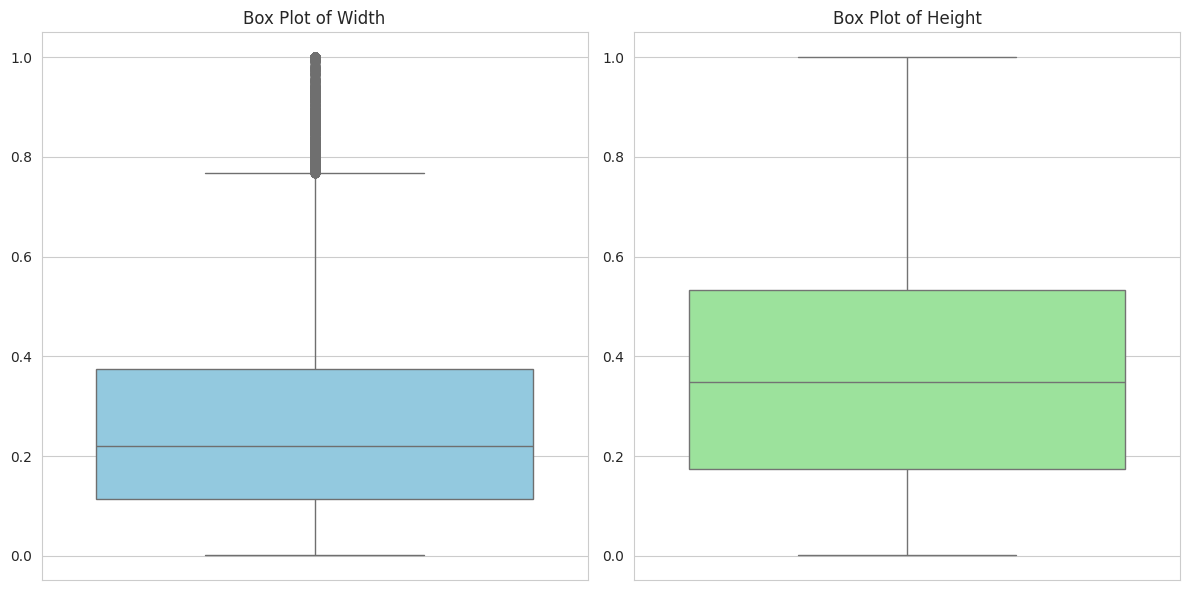

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=w_data, color='skyblue')
plt.title('Box Plot of Width')

plt.subplot(1, 2, 2)
sns.boxplot(y=h_data, color='lightgreen')
plt.title('Box Plot of Height')

plt.tight_layout()
plt.show()

*   у высоты более равномерное распределение
*   У ширины ящик более узкий, значит значения менее разбросаны
*   Для высоты выбросов не видно, значит данные более равномерные

Давайте посчитаем количество животных на изображении.

In [ ]:
def count_bbox(row):
    # Разделяем строку с аннотацией по символу ";", чтобы получить список bounding boxes
    # Возвращаем количество элементов в списке, что соответствует числу bounding boxes
    return len(row.split(";"))

In [ ]:
# Применение функции count_bbox к каждому элементу столбца "detection"
# Результат сохраняется в новом столбце "count_bbox"
train_df["count_bbox"] = train_df["detection"].apply(lambda x: count_bbox(x))

<Axes: >

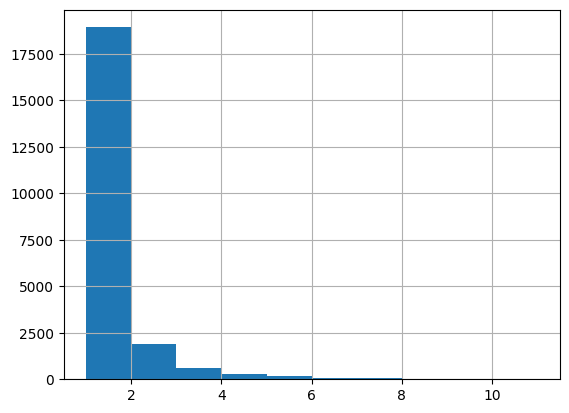

In [ ]:
# Построение гистограммы для визуализации распределения количества bounding boxes
train_df["count_bbox"].hist()

In [ ]:
train_df.shape

(22078, 3)

In [ ]:
train_df["count_bbox"].value_counts()

,count
count_bbox,
1,18933
2,1873
3,596
4,301
5,180
6,72
7,58
8,34
9,17


In [ ]:
MAPPER = ['Заяц', 'Кабан', 'Кошки', 'Куньи', 'Медведь', 'Оленевые', 'Пантеры', 'Полорогие', 'Собачие', 'Сурок']

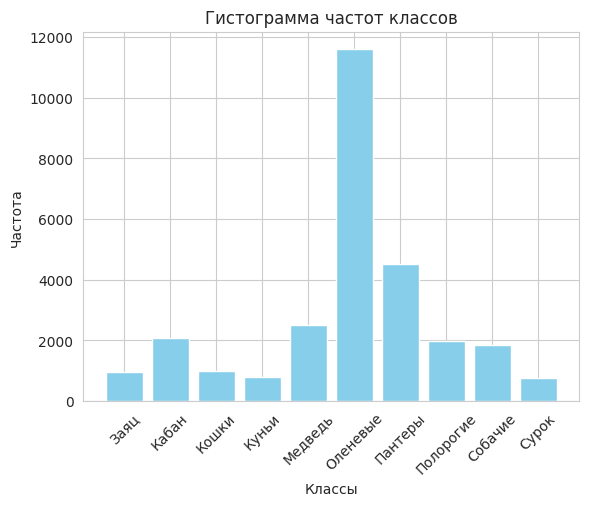

In [ ]:
# Подсчет частот каждого уникального класса в датасете
unique, counts = np.unique(label_data, return_counts=True)

# Преобразование меток классов в названия групп с помощью списка MAPPER
labels = []
for id in unique:
    labels.append(MAPPER[int(float(id))])

# Построение гистограммы частот классов
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Классы')  # Метка для оси X
plt.ylabel('Частота')  # Метка для оси Y
plt.title('Гистограмма частот классов')  # Заголовок графика
plt.xticks(labels, rotation=45)  # Установка меток на оси X с поворотом на 45 градусов для лучшей читаемости
plt.show()


## Визуализация ограничивающих прямоугольников

In [ ]:
# Функция для визуализации bounding boxes на изображении
def visualize_bbox(img, labels, bboxes, class_names):

    # Создаем подписи для каждого box-а на основе меток классов
    captions = [class_names[label_id] for label_id in labels]

    # Визуализация bounding boxes на изображении с помощью imgviz.instances2rgb
    bbox_viz = imgviz.instances2rgb(
        image=img,                    # Исходное изображение
        bboxes=bboxes,                # Координаты bounding boxes
        labels=labels,                # Метки классов для каждого box-а
        captions=captions,            # Подписи классов
        colormap=imgviz.label_colormap(n_label=10),  # Цветовая карта для классов
        font_size=47,                 # Размер шрифта для подписей
        line_width=10                 # Ширина линии для рамок
    )

    # Отображение изображения с наложенными bounding boxes
    plt.figure(dpi=200)
    plt.imshow(bbox_viz)
    plt.axis("off")  # Убираем оси для лучшей видимости изображения


In [ ]:
import os
from PIL import Image
import numpy as np

# Функция для визуализации боксов на изображении по индексу строки в csv файле
def visualization_by_idx(images_dir, train_df, idx, MAPPER): # директория, датафрейм, индекс строки
    # Загружаем изображение
    image_path = os.path.join(images_dir, train_df.loc[idx]["image_name"])
    img = Image.open(image_path)

    # Списки для хранения координат боксов и меток
    bboxes = []
    labels = []

    # Получаем размеры изображения
    img_w, img_h = img.size

    # Парсим аннотации детекции (формат: "метка cx cy w h")
    for markup in train_df.loc[idx]["detection"].split(";"):
        label, cx, cy, w, h = markup.split()
        label = int(label)    # Преобразуем метку в целое число
        cx = float(cx)        # Преобразуем cx в число с плавающей точкой
        cy = float(cy)        # Преобразуем cy в число с плавающей точкой
        w = float(w)          # Преобразуем ширину в число с плавающей точкой
        h = float(h)          # Преобразуем высоту в число с плавающей точкой

        # Преобразуем координаты из относительных (нормализованных) в пиксельные значения
        x1 = int((cx - w / 2) * img_w)  # Левая граница бокса
        x2 = int((cx + w / 2) * img_w)  # Правая граница бокса
        y1 = int((cy - h / 2) * img_h)  # Верхняя граница бокса
        y2 = int((cy + h / 2) * img_h)  # Нижняя граница бокса

        # Добавляем метки и боксы в соответствующие списки
        labels.append(label)
        bboxes.append([y1, x1, y2, x2])  # Формат для визуализации: [y1, x1, y2, x2]

    # Визуализируем изображение с боксовыми аннотациями (предполагается, что функция visualize_bbox уже определена)
    visualize_bbox(np.asarray(img), labels, bboxes, MAPPER)


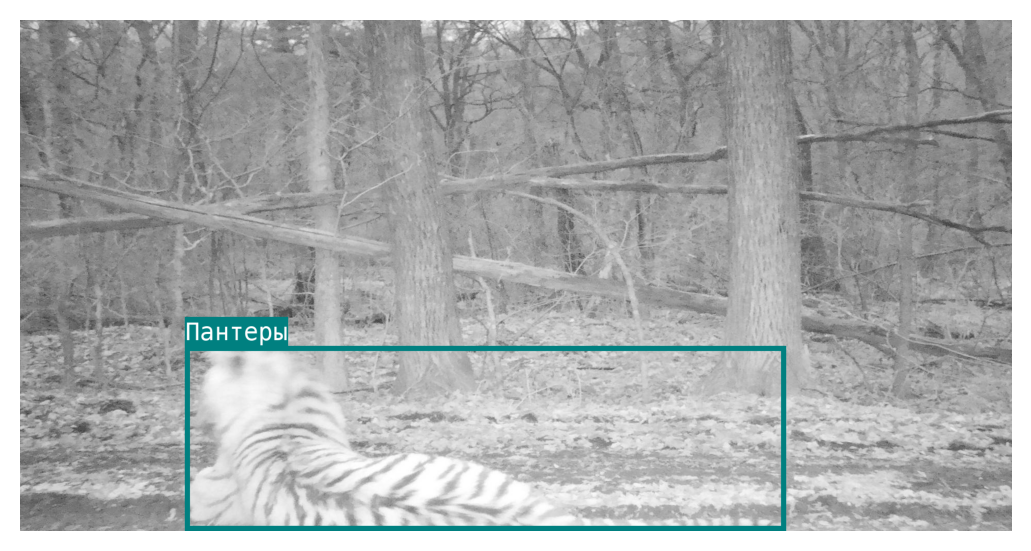

In [ ]:
idx = 23 # Индекс строки для визуализации
visualization_by_idx(train_images_dir, train_df, idx, MAPPER)

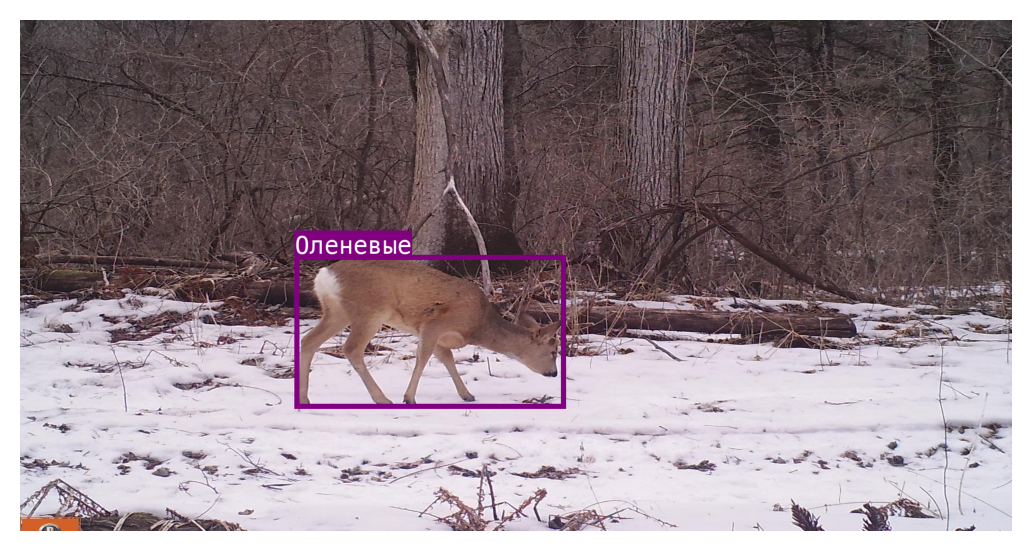

In [ ]:
idx = 99 # Индекс строки для визуализации
visualization_by_idx(train_images_dir, train_df, idx, MAPPER)

# Загрузка и подготовка Yolo

In [ ]:
# images - img1.jpeg - 20 000
# labels - img1.txt - 20 000

# img1.txt:
# # 0 0.4846229553222656 0.8686867356300354 0.10267898440361023 0.14790759980678558

In [ ]:
from concurrent.futures import ThreadPoolExecutor
import albumentations as A
import cv2

def preprocess_markup_yolo_optimized(save_path, images_dir, file_name, split, markup):
    labels_dir = os.path.join(save_path, "labels", split)
    images_dir_dest = os.path.join(save_path, "images", split)
    os.makedirs(labels_dir, exist_ok=True)
    os.makedirs(images_dir_dest, exist_ok=True)

    # Обработка аннотаций
    label_file_path = os.path.join(labels_dir, file_name[:-4] + ".txt")
    with open(label_file_path, "w") as f:
        for det in markup.split(";"):
            f.write(f"{det}\n")

    # Применяем аугментации
    image_source_path = os.path.join(images_dir, file_name)
    img = cv2.imread(image_source_path)
    transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.5),
        A.Resize(640, 640)
    ])
    augmented = transform(image=img)
    img_aug = augmented['image']

    # Сохраняем аугментированное изображение
    image_dest_path = os.path.join(images_dir_dest, file_name)
    cv2.imwrite(image_dest_path, img_aug)

def yolo_files_split_optimized(data_df_path, yolo_data_dir, images_data_dir):
    data_df = pd.read_csv(data_df_path)
    data_df_train, data_df_val = train_test_split(data_df, test_size=0.3, random_state=42)

    # Обработка данных параллельно
    with ThreadPoolExecutor(max_workers=4) as executor:
        for index, row in data_df_train.iterrows():
            executor.submit(preprocess_markup_yolo_optimized, yolo_data_dir, images_data_dir, row["image_name"], "train", row["detection"])
        for index, row in data_df_val.iterrows():
            executor.submit(preprocess_markup_yolo_optimized, yolo_data_dir, images_data_dir, row["image_name"], "val", row["detection"])

In [ ]:
# Требуемая структура данных у YOLO
# # yolo/
# # --- labels/
# #       --- train/
# #             --- 1.txt
# #             --- 2.txt
# #       --- val/
# #             --- 3.txt
# #             --- 4.txt
# # --- images/
# #       --- train/
# #             --- 1.JPG
# #             --- 2.JPG
# #       --- val/
# #             --- 3.JPG
# #             --- 4.JPG
# # --- yolo_config.yaml

In [ ]:
data_df_path = "data/train.csv"
yolo_data_dir = "yolo/"
images_data_dir = "data/train"

Подготовка среды и создание файла YAML

In [ ]:
# создание директорий
Path("yolo/images/train").mkdir(exist_ok=True, parents=True)
Path("yolo/images/val").mkdir(exist_ok=True, parents=True)
Path("yolo/labels/train").mkdir(exist_ok=True, parents=True)
Path("yolo/labels/val").mkdir(exist_ok=True, parents=True)

In [ ]:
# from sklearn.model_selection import train_test_split
yolo_files_split(data_df_path, yolo_data_dir, images_data_dir)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
# загрузка необходимых библиотек
import yaml

# Пример данных для конфигурации YOLO
data = {
    'train': '/content/yolo/images/train',  # путь к обучающим изображениям
    'val': '/content/yolo/images/val',  # путь к изображениям для валидации
    'nc': 10,  # количество классов
    'names': ['Заяц', 'Кабан', 'Кошки', 'Куньи', 'Медведь', 'Оленевые', 'Пантеры', 'Полорогие', 'Собачие', 'Сурок']  # имена классов
}

# Сохранение данных в YAML файл
with open('yolo/yolo_config.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False, allow_unicode=True)

print("YAML файл успешно создан!")

# RCNN, MaskerdRCNN - coco_format

# Hyperparameters
По подробнее можно ознакомиться https://docs.ultralytics.com/ru/guides/hyperparameter-tuning/
```
# hyp.yaml
lr0: 0.01  # initial learning rate (i.e. SGD=1E-2, Adam=1E-3)
lrf: 0.00001  # final learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 5.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 7.5  # box loss gain
cls: 0.5  # cls loss gain (scale with pixels)
dfl: 1.5  # dfl loss gain
pose: 12.0  # pose loss gain
kobj: 1.0  # keypoint obj loss gain
label_smoothing: 0.0  # label smoothing (fraction)
nbs: 64  # nominal batch size
hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)
hsv_v: 0.4  # image HSV-Value augmentation (fraction)
degrees: 10.0  # image rotation (+/- deg)
translate: 0.1  # image translation (+/- fraction)
scale: 0.6  # image scale (+/- gain)
shear: 0.5  # image shear (+/- deg) from -0.5 to 0.5
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.0  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 1.0  # image mosaic (probability)
mixup: 0.0  # image mixup (probability)
copy_paste: 0.2  # segment copy-paste (probability)
augment: True
```
```
training_results = model.train(
        data=data_yaml,
        hyp=hyp_yaml # путь к hyp.yaml
        epochs=5, # число эпох для обучения
        imgsz=640, # размер изображения для обучения
        batch=32, # размер батча для обучения
        device=0, # номер девайса для обучения
        single_cls=True # для обучения с учетом классов на основании data.yaml
    )
```

# Обучение YOLO модели

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
os.environ['WANDB_MODE'] = 'disabled'

отключает автоматическую интеграцию с платформой Weights & Biases

In [ ]:
import logging
import torch
import albumentations as A
from ultralytics import YOLO
from ultralytics.yolo.data.augment import AlbumentationsTransform
import torch.nn as nn

# Настройка кастомных аугментаций
albumentations_transform = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=(-0.3, 0.3), contrast_limit=(-0.3, 0.3)),
    A.GaussNoise(var_limit=(10.0, 50.0)),
    A.MotionBlur(blur_limit=5),
])

# Кастомная функция потерь
class CombinedLoss(nn.Module):
    def __init__(self):
        super(CombinedLoss, self).__init__()
        self.focal_loss = nn.FocalLoss() # для классификации с дисбалансом классов
        self.ciou_loss = nn.CIoULoss() # для регрессии прямоугольников, IoU - interseption over union
        # расстояние между центрами bbox_pred и bbox_true
        # аспетное соотношение высота/ширина
        # 50х100 - 60х200
        # CIoULoss = Iou - dist - ratio

    def forward(self, preds, targets):
        return self.focal_loss(preds, targets) + self.ciou_loss(preds, targets)

# loss = nn.CrossEntropyLoss()
# loss = nn.BCEntropyLoss()
# loss = MSELoss()

# Настройка логгера
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

from ultralytics import YOLO

def train(model_name, data_yaml):
    model = YOLO(model_name)
    # map50 - FP, TN, FP, FN
    # IoU
    best_map50 = 0
    best_model_wts = None # лучшая модель

    # Указываем кастомные аугментации
    model.add_augmentations(AlbumentationsTransform(albumentations_transform))

    # Указываем кастомную функцию потерь
    model.loss = CombinedLoss()
    # loss = nn.CrossEntropy()

    for epoch in range(35):  # Укажите нужное количество эпох
        training_results = model.train(
            data=data_yaml,
            epochs=1,  # Обучение за одну эпоху
            imgsz=640,
            batch=64,
            device=0,
            optimizer='Adam',
            lr0=0.01,
            lrf=0.00001,
        )

        current_map50 = training_results.get('metrics/map50', 0)

        logger.info()

        # Сохранение лучших весов
        if current_map50 > best_map50:
            best_map50 = current_map50
            best_model_wts = model.state_dict()  # Сохранение лучших весов
            torch.save(best_model_wts, '/content/drive/MyDrive/best_model.pth')
            logger.info('Best model saved.')
# f"Epoch {epoch + 1}: mAP@0.5 = {current_map50}"


In [ ]:
%%capture training_output
# yolo/yolo_config
# Ваш код для обучения
train("yolov8m.pt", "data.yaml")

# Сохранение в файл
with open("/content/drive/MyDrive/training_log.txt", "w") as f:
    f.write(training_output.stdout)

100%|██████████| 49.7M/49.7M [00:01<00:00, 49.2MB/s]


Ultralytics 8.3.44 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=yolo/yolo_config.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 22.2M/22.2M [00:00<00:00, 40.5MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 236MB/s]


AMP: checks passed ✅


train: Scanning /content/yolo/labels/train... 15454 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15454/15454 [00:41<00:00, 375.47it/s]


train: New cache created: /content/yolo/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/yolo/labels/val... 6624 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6624/6624 [00:10<00:00, 652.48it/s]


val: New cache created: /content/yolo/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.79G     0.8593      4.615      1.206         40        640:   0%|          | 4/966 [00:03<12:02,  1.33it/s]

       1/30      6.79G     0.8492      4.761       1.19         38        640:   1%|          | 6/966 [00:04<09:45,  1.64it/s]
100%|██████████| 755k/755k [00:00<00:00, 107MB/s]
       1/30      6.83G     0.7779      1.394      1.143         21        640: 100%|██████████| 966/966 [09:51<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [01:52<00:00,  1.84it/s]


                   all       6624       8386      0.717      0.653        0.7      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.85G     0.8713      1.132      1.193         35        640: 100%|██████████| 966/966 [09:32<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [01:49<00:00,  1.89it/s]


                   all       6624       8386       0.73      0.643      0.709      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      6.75G     0.8717      1.063       1.19         42        640: 100%|██████████| 966/966 [09:28<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [01:53<00:00,  1.83it/s]


                   all       6624       8386      0.779      0.676      0.754      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      6.85G     0.8261     0.9596      1.161         35        640: 100%|██████████| 966/966 [09:35<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [01:54<00:00,  1.81it/s]


                   all       6624       8386      0.836       0.71      0.795      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.84G     0.7896     0.8842      1.135         34        640: 100%|██████████| 966/966 [09:39<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [01:58<00:00,  1.75it/s]


                   all       6624       8386      0.848      0.706      0.789      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.84G     0.7561     0.7953      1.113         31        640: 100%|██████████| 966/966 [09:37<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [01:51<00:00,  1.85it/s]


                   all       6624       8386      0.869      0.762      0.845      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.87G     0.7234      0.748      1.095         49        640: 100%|██████████| 966/966 [09:29<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [01:55<00:00,  1.80it/s]


                   all       6624       8386      0.888      0.786      0.865      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      6.87G     0.7097     0.7035      1.087         38        640: 100%|██████████| 966/966 [09:31<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [01:51<00:00,  1.85it/s]

                   all       6624       8386        0.9      0.807      0.888      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      6.84G     0.6822     0.6601      1.066         30        640: 100%|██████████| 966/966 [09:22<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [01:51<00:00,  1.85it/s]


                   all       6624       8386      0.895      0.822      0.892      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      6.86G     0.6677     0.6315      1.062         43        640: 100%|██████████| 966/966 [09:23<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [01:54<00:00,  1.81it/s]


                   all       6624       8386      0.918      0.843      0.905      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.84G     0.6556     0.6118      1.054         54        640: 100%|██████████| 966/966 [09:35<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [01:52<00:00,  1.83it/s]


                   all       6624       8386      0.907       0.84      0.912      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      6.85G     0.6439     0.5798      1.047         33        640: 100%|██████████| 966/966 [09:36<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [01:56<00:00,  1.78it/s]

                   all       6624       8386      0.926      0.853      0.921      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.88G     0.6349     0.5579      1.038         30        640: 100%|██████████| 966/966 [09:34<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [01:56<00:00,  1.78it/s]

                   all       6624       8386      0.919      0.852      0.918       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.86G     0.6174     0.5392      1.028         48        640: 100%|██████████| 966/966 [09:31<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 207/207 [01:53<00:00,  1.82it/s]


                   all       6624       8386       0.94      0.876      0.935      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.83G     0.6092     0.5145      1.028         43        640:  22%|██▏       | 209/966 [02:05<07:13,  1.75it/s]

# Пример инференса модели
Предсказание долно содержать информацию:
- image_name - название файла
- predicted_detection - координаты ограничивающего прямоугольника (bounding box)
        в формате "label_1 cx_1 cy_1 w_1 h_1 conf_1;label_2 cx_2 cy_2 w_2 h_2 conf_2; ... ;label_n cx_n cy_n w_n h_n conf_n",
        где label_i - класс, к которому относится животное, (cx_i, cy_i) - координата центра i-го прямоугольника (в относительных значениях), a w_i, h_i - ширина и высота i-го прямоугольника (в относительных значениях),
        conf_i - уверенность модели в предсказании.

In [ ]:
def soft_nms_per_class(boxes, scores, classes, sigma=0.5, score_thresh=0.3, iou_thresh=0.5):
    final_indices = []
    unique_classes = np.unique(classes)

    for cls in unique_classes:
        cls_indices = np.where(classes == cls)[0]
        cls_boxes = boxes[cls_indices]
        cls_scores = scores[cls_indices]

        N = len(cls_boxes)
        indices = np.arange(N)

        for i in range(N):
            maxscore = cls_scores[i]
            maxpos = i

            # Получаем рамку с максимальным скором
            for pos in range(i+1, N):
                if cls_scores[pos] > maxscore:
                    maxscore = cls_scores[pos]
                    maxpos = pos

            # Меняем местами текущий бокс i с боксом с наибольшим оценкой
            cls_boxes[i], cls_boxes[maxpos] = cls_boxes[maxpos].copy(), cls_boxes[i].copy()
            cls_scores[i], cls_scores[maxpos] = cls_scores[maxpos], cls_scores[i]

            # Перебираем все боксы после текущего и уменьшаем их score в зависимости от IoU
            xywh = cls_boxes[i]
            scores_i = cls_scores[i]

            for j in range(i+1, N):
                xx1 = np.maximum(xywh[0], cls_boxes[j][0])
                yy1 = np.maximum(xywh[1], cls_boxes[j][1])
                xx2 = np.minimum(xywh[0] + xywh[2], cls_boxes[j][0] + cls_boxes[j][2])
                yy2 = np.minimum(xywh[1] + xywh[3], cls_boxes[j][1] + cls_boxes[j][3])

                w = np.maximum(0, xx2 - xx1)
                h = np.maximum(0, yy2 - yy1)
                inter = w * h

                ovr = inter / ((xywh[2] * xywh[3]) + (cls_boxes[j][2] * cls_boxes[j][3]) - inter)

                # Мягкое уменьшение значения score для перекрывающихся боксов
                if ovr > iou_thresh:
                    weight = np.exp(-(ovr ** 2) / sigma)
                    cls_scores[j] *= weight

            # Исключаем боксы с score ниже порогового значения
            indices = indices[cls_scores > score_thresh]

        final_indices.extend(cls_indices[indices])

    return final_indices

In [ ]:
from torchvision import transforms
import numpy as np

def apply_tta(image):
    """Применяет набор аугментаций к изображению."""
    augmentations = [
        transforms.Compose([]),  # Оригинальное изображение без изменений
        transforms.Compose([transforms.functional.hflip]),  # Отражение по горизонтали
        transforms.Compose([transforms.functional.vflip]),  # Отражение по вертикали
        transforms.Compose([transforms.ColorJitter(brightness=0.2, contrast=0.2)]),  # Изменение яркости и контраста
        transforms.Compose([transforms.RandomRotation(degrees=15)]),  # Случайный поворот на ±15 градусов
        transforms.Compose([
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1))  # Случайное смещение
        ]),
        transforms.Compose([
            transforms.RandomAffine(degrees=0, shear=10)  # Случайное сдвижение
        ]),
        transforms.Compose([
            transforms.RandomResizedCrop((image.size[1], image.size[0]), scale=(0.8, 1.0))  # Случайное обрезание
        ])
    ]

    return [aug(image) for aug in augmentations]

In [ ]:
def detection_image_with_tta(image_path, detection_model):
    # Открываем изображение
    image = Image.open(image_path)
    augmented_images = apply_tta(image)

    all_detections = []

    for aug_image in augmented_images:
        detections = []
        # Выполняем предсказание на аугментированном изображении
        results = detection_model(aug_image)
        results = results[0]

        if len(results.boxes.xyxy.cpu()) == 0:
            continue  # Нет объектов на аугментированном изображении

        # Собираем все боксы, классы и уверенности
        boxes = results.boxes.xywhn.cpu().numpy()
        scores = results.boxes.conf.cpu().numpy()
        classes = results.boxes.cls.cpu().numpy()

        for cls, xywhn, conf in zip(classes, boxes, scores):
            detections.append({
                "class": cls,
                "box": xywhn,
                "confidence": conf
            })

        all_detections.extend(detections)

    # Применяем Soft-NMS к объединенным результатам всех аугментаций
    boxes = np.array([det['box'] for det in all_detections])
    scores = np.array([det['confidence'] for det in all_detections])
    classes = np.array([det['class'] for det in all_detections])

    keep_indices = soft_nms_per_class(boxes, scores, classes, sigma=0.5, score_thresh=0.3, iou_thresh=0.5)

    final_detections = []
    for idx in keep_indices:
        cls = classes[idx]
        xywhn = boxes[idx]
        conf = scores[idx]

        final_detections.append(" ".join([
            str(int(cls)),
            str(xywhn[0]),
            str(xywhn[1]),
            str(xywhn[2]),
            str(xywhn[3]),
            str(conf)
        ]))

    return ";".join(final_detections)

In [ ]:
def inference_with_tta(detection_model, test_image_dir, output_path):
    # Инициализация пустых списков для имен изображений и предсказаний
    results_name = []
    results_detection = []

    # Перебор изображений в директории
    for image_name in os.listdir(test_image_dir):
        image_path = os.path.join(test_image_dir, image_name)

        # Детекция объектов на изображении с TTA
        result_detect = detection_image_with_tta(image_path=image_path, detection_model=detection_model)
        # Добавляем имя изображения в результирующий список
        results_name.append(Path(image_name).name)
        # Добавляем предсказание для изображения в результирующий список
        results_detection.append(result_detect)

    # Создаем DataFrame для результатов
    df_result = pd.DataFrame({
        "image_name": results_name,
        "predicted_detection": results_detection
    })

    # Сохраняем результаты в CSV
    df_result.to_csv(output_path, index=False)

In [ ]:
# Объявление путей для модели, изображений и вывода результатов
path_detection_model_cpt = Path("/content/runs/detect/train/weights/best.pt")
output_path = Path("submission.csv")
dir_test_images = Path("data/check/images")

# запуск модели и выгрузка файла с результатами работы модели с TTA
detection_model = YOLO(path_detection_model_cpt)
inference_with_tta(detection_model, dir_test_images, output_path)

## Визуализируем результаты предсказания

In [ ]:
def visualization_by_idx_prediction(images_dir, train_df, idx, MAPPER):
    # Извлекаем путь к изображению по индексу
    image_path = os.path.join(images_dir, train_df.loc[idx]["image_name"])
    img = Image.open(image_path)

    # Инициализация пустых списков для хранения координат боксов и меток
    bboxes = []
    labels = []

    img_w, img_h = img.size  # Ширина и высота изображения

    # Разбираем предсказания для данного изображения
    for markup in train_df.loc[idx]["predicted_detection"].split(";"):
        # Обработка предсказания: label, cx, cy, w, h, conf
        label, cx, cy, w, h, conf = markup.split()
        # Преобразуем метку в целое число
        label = int(float(label))
        # Преобразуем координаты в float
        cx, cy, w, h = map(float, [cx, cy, w, h])

        # Предобрабатываем координаты боксов в пикселях
        x1 = int((cx - w/2) * img_w)
        x2 = int((cx + w/2) * img_w)
        y1 = int((cy - h/2) * img_h)
        y2 = int((cy + h/2) * img_h)

        # Добавляем метки и боксы в соответствующие списки
        labels.append(label)
        bboxes.append([y1, x1, y2, x2])

    # Визуализируем боксы на изображении
    visualize_bbox(asarray(img), labels, bboxes, MAPPER)

In [ ]:
# чтение csv файла с предсказаниями
submission_df = pd.read_csv("submission.csv")

In [ ]:
idx = 1 # Индекс строки для визуализации
visualization_by_idx_prediction(dir_test_images, submission_df, idx, MAPPER)